# Face Recognition of 5 Sports Celebrity
This Model Recognise 5 sports celebrity which are Ellyse Perry, Virat Kohli, Smriti Mandhana, MS Dhoni, Lionel Messi

## Load packages

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
img = cv2.imread('./test_images/smriti1.jpg')
img.shape

(194, 259, 3)

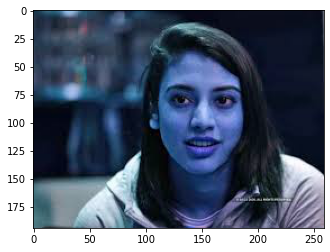

In [36]:
plt.imshow(img)

## Convert Image into gray scale image

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 259)

In [38]:
gray

array([[ 58,  57,  58, ...,  26,  52, 109],
       [ 58,  58,  57, ...,  24,  50, 107],
       [ 59,  58,  57, ...,  20,  46, 103],
       ...,
       [120, 119, 117, ..., 153, 150, 145],
       [122, 121, 119, ..., 149, 156, 162],
       [122, 121, 119, ..., 149, 155, 162]], dtype=uint8)

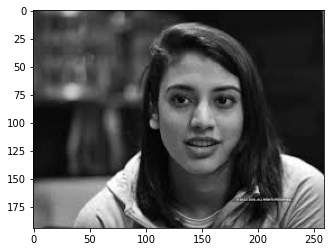

In [39]:
plt.imshow(gray, cmap='gray')

## Add Haarcascade for face and eye

In [40]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 98,  40, 105, 105]], dtype=int32)

In [41]:
x, y, w, h = faces[0]
x, y, w, h

(98, 40, 105, 105)

## Detecting face using opencv rectangle

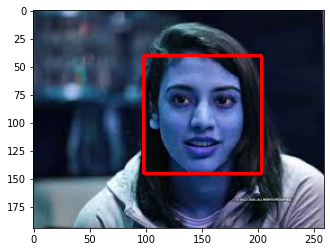

In [42]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

## Detecting Eyes using opencv

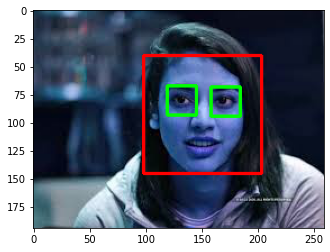

In [43]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0), 2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

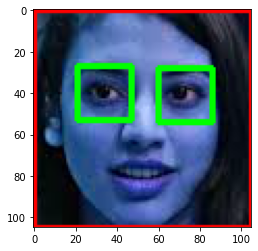

In [44]:
plt.imshow(roi_color, cmap='gray')

## Crop all images if images have 2 eyes

In [45]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

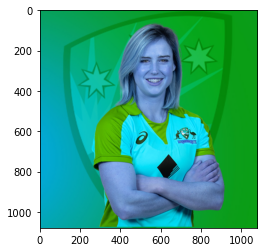

In [46]:
original_image = cv2.imread("./test_images/ellyse_perry1.jpg")
plt.imshow(original_image)

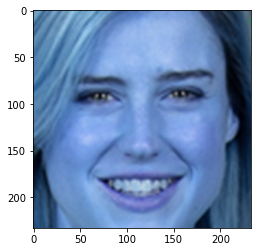

In [47]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ellyse_perry1.jpg')
plt.imshow(cropped_image)

In [27]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/ellyse_perry3.jpg')
cropped_image_no_2_eyes

array([[[ 18,   3,  47],
        [ 18,   3,  47],
        [ 18,   3,  47],
        ...,
        [ 20,  31,  61],
        [ 22,  33,  63],
        [ 26,  36,  66]],

       [[ 18,   3,  47],
        [ 18,   3,  47],
        [ 18,   3,  47],
        ...,
        [ 20,  31,  61],
        [ 21,  32,  62],
        [ 25,  35,  65]],

       [[ 18,   3,  47],
        [ 18,   3,  47],
        [ 18,   3,  47],
        ...,
        [ 20,  31,  61],
        [ 21,  32,  62],
        [ 23,  33,  63]],

       ...,

       [[110, 153, 192],
        [121, 164, 203],
        [121, 164, 203],
        ...,
        [ 91, 132, 165],
        [ 95, 132, 166],
        [120, 155, 188]],

       [[106, 147, 186],
        [122, 163, 202],
        [122, 165, 204],
        ...,
        [ 97, 135, 169],
        [ 95, 132, 166],
        [126, 161, 195]],

       [[105, 146, 185],
        [119, 160, 199],
        [122, 163, 202],
        ...,
        [ 98, 137, 169],
        [102, 139, 173],
        [127, 159, 194]]

In [28]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

## Make directory to save cropped Image

In [29]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['./datasets/cropped',
 './datasets/ellyse_perry',
 './datasets/lionel_messi',
 './datasets/ms_dhoni',
 './datasets/smriti_mandhana',
 './datasets/virat_kohli']

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
ellyse_perry
Generating cropped images in folder:  ./datasets/cropped/ellyse_perry
lionel_messi
Generating cropped images in folder:  ./datasets/cropped/lionel_messi
ms_dhoni
Generating cropped images in folder:  ./datasets/cropped/ms_dhoni
smriti_mandhana
Generating cropped images in folder:  ./datasets/cropped/smriti_mandhana
virat_kohli
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [33]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    
    #Datatype conversion
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    #compute cofficient
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #process coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H


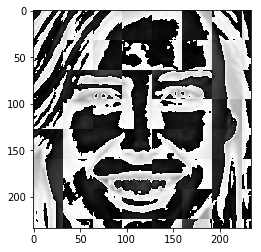

In [34]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

## Make Dictionary of clebrity name and image file name

In [35]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ellyse_perry': ['./datasets/cropped/ellyse_perry\\ellyse_perry10.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry11.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry12.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry13.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry14.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry15.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry16.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry17.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry18.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry19.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry2.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry20.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry23.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry24.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry27.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry28.png',
  './datasets/cropped/ellyse_perry\\ellyse_perry3.png',
  './datasets/cro

In [36]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'ellyse_perry': 0,
 'lionel_messi': 1,
 'ms_dhoni': 2,
 'smriti_mandhana': 3,
 'virat_kohli': 4}

## Split the dictionary into X and Y

In [37]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [38]:
len(X)

215

In [42]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(215, 4096)

In [43]:
X[0]

array([ 18.,   3.,  47., ...,  23.,  67., 247.])

## Import support vector classifier from SVM

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Make pipeline for better hyperparameter

In [54]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='linear', C=10))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='linear'))])

In [55]:
pipe.score(X_test, y_test)

0.8333333333333334

In [56]:
y_pred = pipe.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.80      0.89        10
           2       0.73      0.80      0.76        10
           3       0.88      0.88      0.88        16
           4       0.83      0.62      0.71         8

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.82        54
weighted avg       0.85      0.83      0.83        54



In [58]:
accuracy_score(y_test, y_pred)

0.8333333333333334

## Check diffrent alogrithms if they give better accuracy then SVM

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [61]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.850758,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.576705,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.838826,{'logisticregression__C': 1}


In [62]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(X_test, y_test)

0.8333333333333334

In [64]:
best_estimators['random_forest'].score(X_test, y_test)

0.6296296296296297

In [65]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8888888888888888

In [66]:
best_clf = best_estimators['svm']

Text(33.0, 0.5, 'predicted')

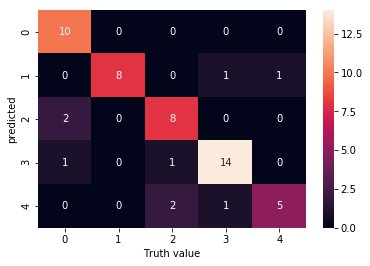

In [67]:
import seaborn as sns
plt.figure()
cm = confusion_matrix(y_test, best_clf.predict(X_test))
sns.heatmap(cm, annot=True)
plt.xlabel('Truth value')
plt.ylabel('predicted')

In [68]:
class_dict

{'ellyse_perry': 0,
 'lionel_messi': 1,
 'ms_dhoni': 2,
 'smriti_mandhana': 3,
 'virat_kohli': 4}

In [69]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']